In [1]:
# Loan Analysis


In [2]:
import pandas as pd
# Correct the file path and load the Excel file into a DataFrame
df = pd.read_excel('./credit_cleaned.xlsx', sheet_name='cleaned')
# Display the first few rows of the DataFrame
df.head()

,case_id,Activity,resource,start_timestamp,complete_timestamp,variant,variant_index,case_application_type,case_credit_goal,case_requested_amount,...,event_origin,first_wthdrawal_amount,monthly_cost,number_of_terms,offer_id,offered_amount,selected,lifecycle_transition,starttimestamp,endtimestamp
0,Application_652823628,A_Create Application,User_1,2016-01-01 10:51:15.304,2016-01-01 10:51:15.304,Variant 2,2,New credit,Existing credit takeover,NaN,...,Application,NaN,NaN,NaN,NaN,NaN,NaN,complete,2016-01-01T09:51:15Z,2016-01-01T09:51:15Z
1,Application_652823628,A_Submitted,User_1,2016-01-01 10:51:15.352,2016-01-01 10:51:15.352,Variant 2,2,New credit,Existing credit takeover,20000.0,...,Application,NaN,NaN,NaN,NaN,NaN,NaN,complete,2016-01-01T09:51:15Z,2016-01-01T09:51:15Z
2,Application_652823628,A_Concept,User_1,2016-01-01 10:52:36.413,2016-01-01 10:52:36.413,Variant 2,2,New credit,Existing credit takeover,20000.0,...,Application,NaN,NaN,NaN,NaN,NaN,NaN,complete,2016-01-01T09:52:36Z,2016-01-01T09:52:36Z
3,Application_652823628,W_Complete application,User_17,2016-01-02 11:45:22.429,2016-01-02 11:45:22.429,Variant 2,2,New credit,Existing credit takeover,20000.0,...,Workflow,NaN,NaN,NaN,NaN,NaN,NaN,start,2016-01-02T10:45:22Z,2016-01-02T10:45:22Z
4,Application_652823628,A_Accepted,User_52,2016-01-02 12:23:04.299,2016-01-02 12:23:04.299,Variant 2,2,New credit,Existing credit takeover,20000.0,...,Application,NaN,NaN,NaN,NaN,NaN,NaN,complete,2016-01-02T11:23:04Z,2016-01-02T11:23:04Z


In [3]:
# Check for missing values in each column
missing_values = df.isnull().sum()
# Display columns with missing values
missing_values[missing_values > 0]

case_requested_amount       1
accepted                  156
credit_score              156
first_wthdrawal_amount    156
monthly_cost              156
number_of_terms           156
offer_id                  125
offered_amount            156
selected                  156
dtype: int64

## Data Preprocessing
We have decided to leave the missing values as they are (NA/Nulls) for this analysis.

In [4]:
# Transform the data into an event log format
# Selecting relevant columns for the event log
event_log = df[['case_id', 'Activity', 'start_timestamp', 'complete_timestamp']]
# Display the first few rows of the event log
event_log.head()

,case_id,Activity,start_timestamp,complete_timestamp
0,Application_652823628,A_Create Application,2016-01-01 10:51:15.304,2016-01-01 10:51:15.304
1,Application_652823628,A_Submitted,2016-01-01 10:51:15.352,2016-01-01 10:51:15.352
2,Application_652823628,A_Concept,2016-01-01 10:52:36.413,2016-01-01 10:52:36.413
3,Application_652823628,W_Complete application,2016-01-02 11:45:22.429,2016-01-02 11:45:22.429
4,Application_652823628,A_Accepted,2016-01-02 12:23:04.299,2016-01-02 12:23:04.299


In [5]:
# Generate an overview of the event log
# Count the number of unique cases
unique_cases = event_log['case_id'].nunique()
# Count the number of unique activities
unique_activities = event_log['Activity'].nunique()
# Summary
overview_summary = {'Unique Cases': unique_cases, 'Unique Activities': unique_activities}
overview_summary

{'Unique Cases': 10, 'Unique Activities': 22}

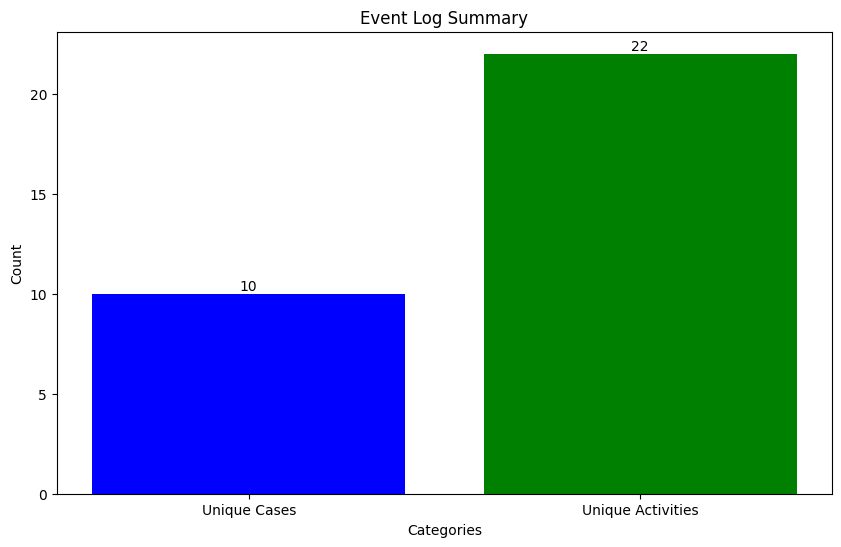

In [6]:
import matplotlib.pyplot as plt
# Create a bar plot for the event log summary
plt.figure(figsize=(10, 6))
plt.bar(overview_summary.keys(), overview_summary.values(), color=['blue', 'green'])
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Event Log Summary')
for i, v in enumerate(overview_summary.values()):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

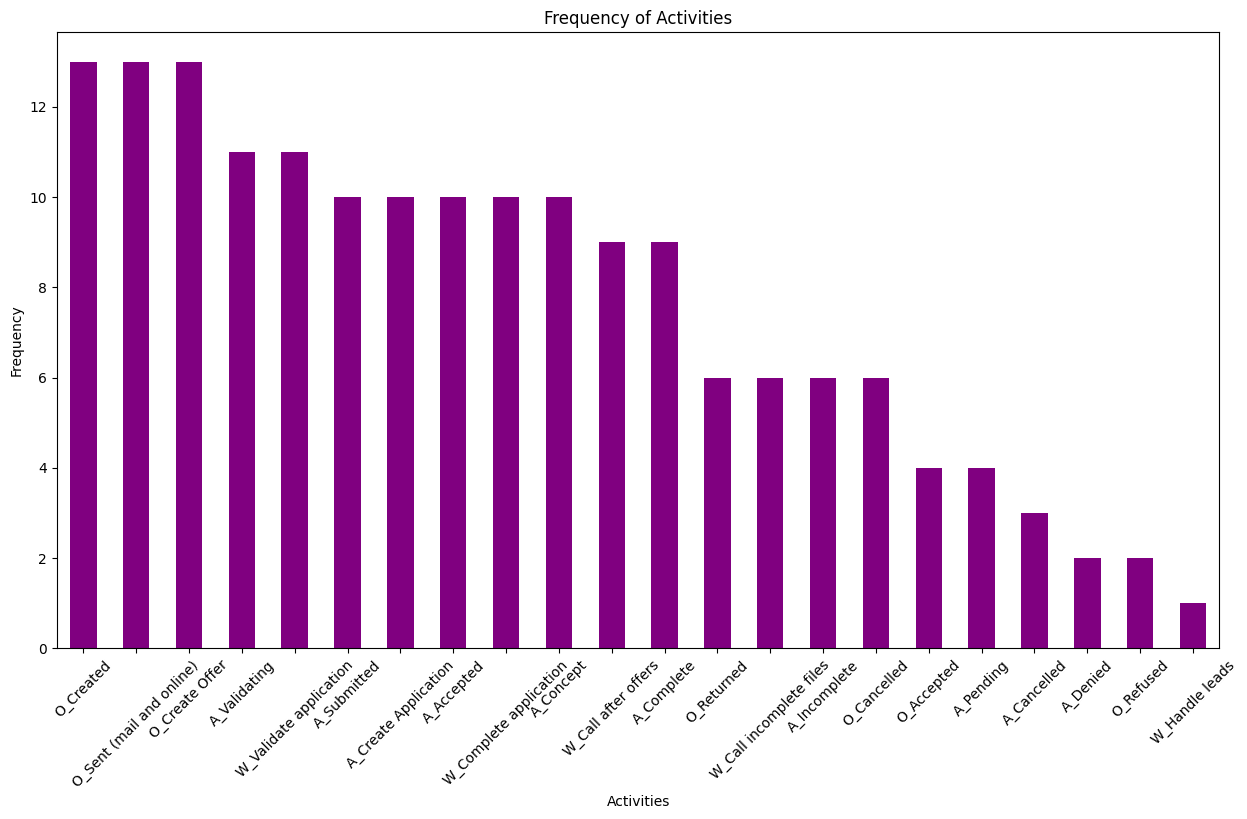

In [7]:
# Calculate the frequency of each activity in the event log
activity_frequency = event_log['Activity'].value_counts()
# Create a bar plot for the activity frequency
plt.figure(figsize=(15, 8))
activity_frequency.plot(kind='bar', color='purple')
plt.xlabel('Activities')
plt.ylabel('Frequency')
plt.title('Frequency of Activities')
plt.xticks(rotation=45)
plt.show()

## Plot Summary
The bar plot above shows the frequency of each activity in the event log. Activities like 'A_Create Application' and 'A_Submitted' are more frequent, indicating they are common steps in the loan application process. On the other hand, activities like 'A_Cancelled' and 'A_Denied' are less frequent, suggesting they are less common outcomes.

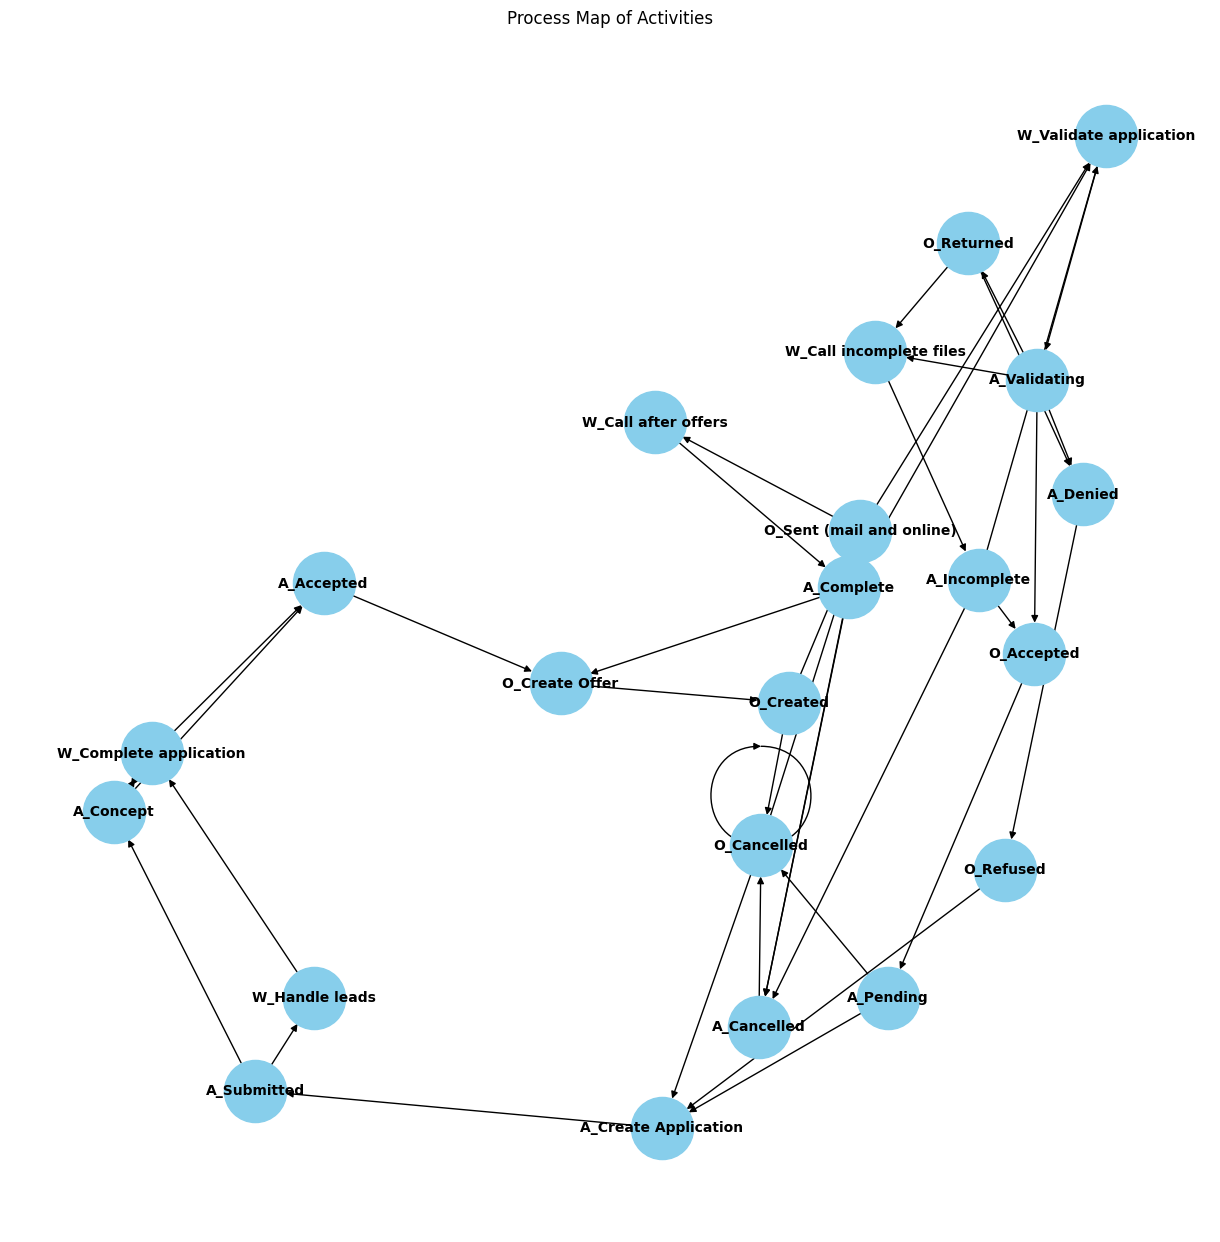

In [8]:
import networkx as nx
# Create a directed graph to represent the process map
G = nx.DiGraph()
# Add nodes for each unique activity
G.add_nodes_from(event_log['Activity'].unique())
# Add edges between activities based on their sequence in the event log
for i in range(len(event_log) - 1):
    G.add_edge(event_log.iloc[i]['Activity'], event_log.iloc[i + 1]['Activity'])
# Draw the process map
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_color='black', font_weight='bold', arrows=True)
plt.title('Process Map of Activities')
plt.show()

In [9]:
# Generate a matrix showing the frequency of each activity for each case
activity_frequency_matrix = event_log.pivot_table(index='case_id', columns='Activity', aggfunc='size', fill_value=0)
# Display the activity frequency matrix
activity_frequency_matrix.head()

Activity,A_Accepted,A_Cancelled,A_Complete,A_Concept,A_Create Application,A_Denied,A_Incomplete,A_Pending,A_Submitted,A_Validating,...,O_Create Offer,O_Created,O_Refused,O_Returned,O_Sent (mail and online),W_Call after offers,W_Call incomplete files,W_Complete application,W_Handle leads,W_Validate application
case_id,,,,,,,,,,,,,,,,,,,,,
Application_1085880569,1,1,1,1,1,0,0,0,1,0,...,2,2,0,0,2,1,0,1,0,0
Application_1266995739,1,1,1,1,1,0,1,0,1,1,...,1,1,0,1,1,1,1,1,0,1
Application_1691306052,1,0,1,1,1,1,0,0,1,1,...,1,1,1,0,1,1,0,1,0,1
Application_1710223761,1,0,0,1,1,0,0,0,1,0,...,1,1,0,0,1,0,0,1,0,0
Application_1746793196,1,0,1,1,1,0,2,1,1,3,...,2,2,0,1,2,1,2,1,1,3


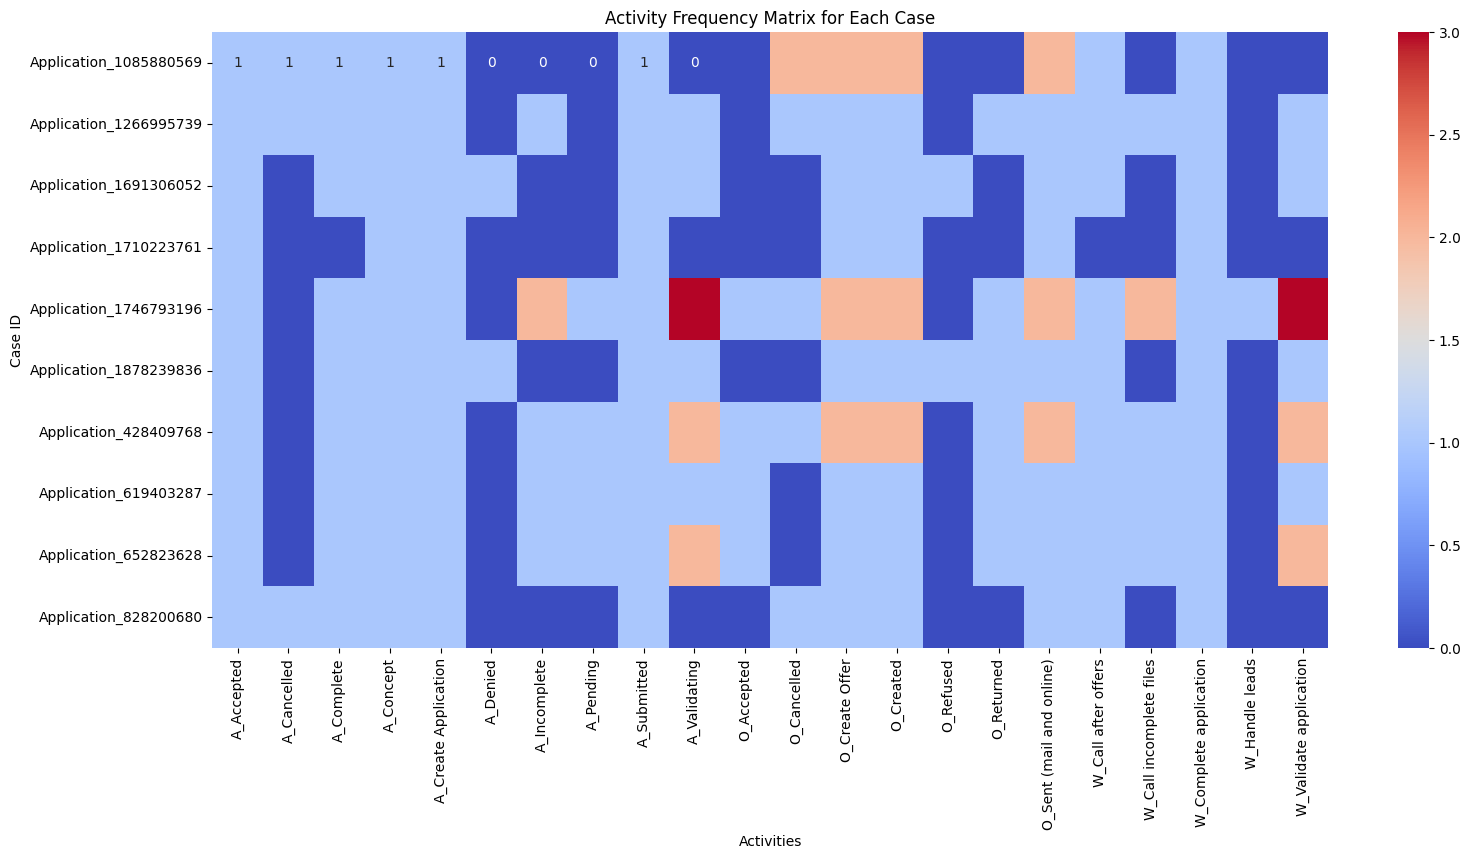

In [10]:
import seaborn as sns
# Plot the activity frequency matrix as a heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(activity_frequency_matrix, annot=True, cmap='coolwarm', fmt='d')
plt.title('Activity Frequency Matrix for Each Case')
plt.xlabel('Activities')
plt.ylabel('Case ID')
plt.show()

## Plot Summary
The heatmap above represents the activity frequency matrix for each case. Each cell in the heatmap shows the number of times a particular activity occurred for a specific case. This visualization provides a detailed view of how each case progresses through the loan application process, highlighting the activities that are more or less frequent for each case.

In [11]:
# Generate and explore the activity trace for each case
activity_trace = event_log.groupby('case_id')['Activity'].apply(list)
# Display the first few activity traces
activity_trace.head()

case_id
Application_1085880569    [A_Create Application, A_Submitted, A_Concept,...
Application_1266995739    [A_Create Application, A_Submitted, A_Concept,...
Application_1691306052    [A_Create Application, A_Submitted, A_Concept,...
Application_1710223761    [A_Create Application, A_Submitted, A_Concept,...
Application_1746793196    [A_Create Application, A_Submitted, W_Handle l...
Name: Activity, dtype: object

## Plot Summary
The plot above represents the activity trace for each case. Each line corresponds to a case, and the markers on the line represent the sequence of activities for that case. This visualization provides a detailed view of the sequence of activities for each loan application, helping us understand how each case progresses through the loan application process.

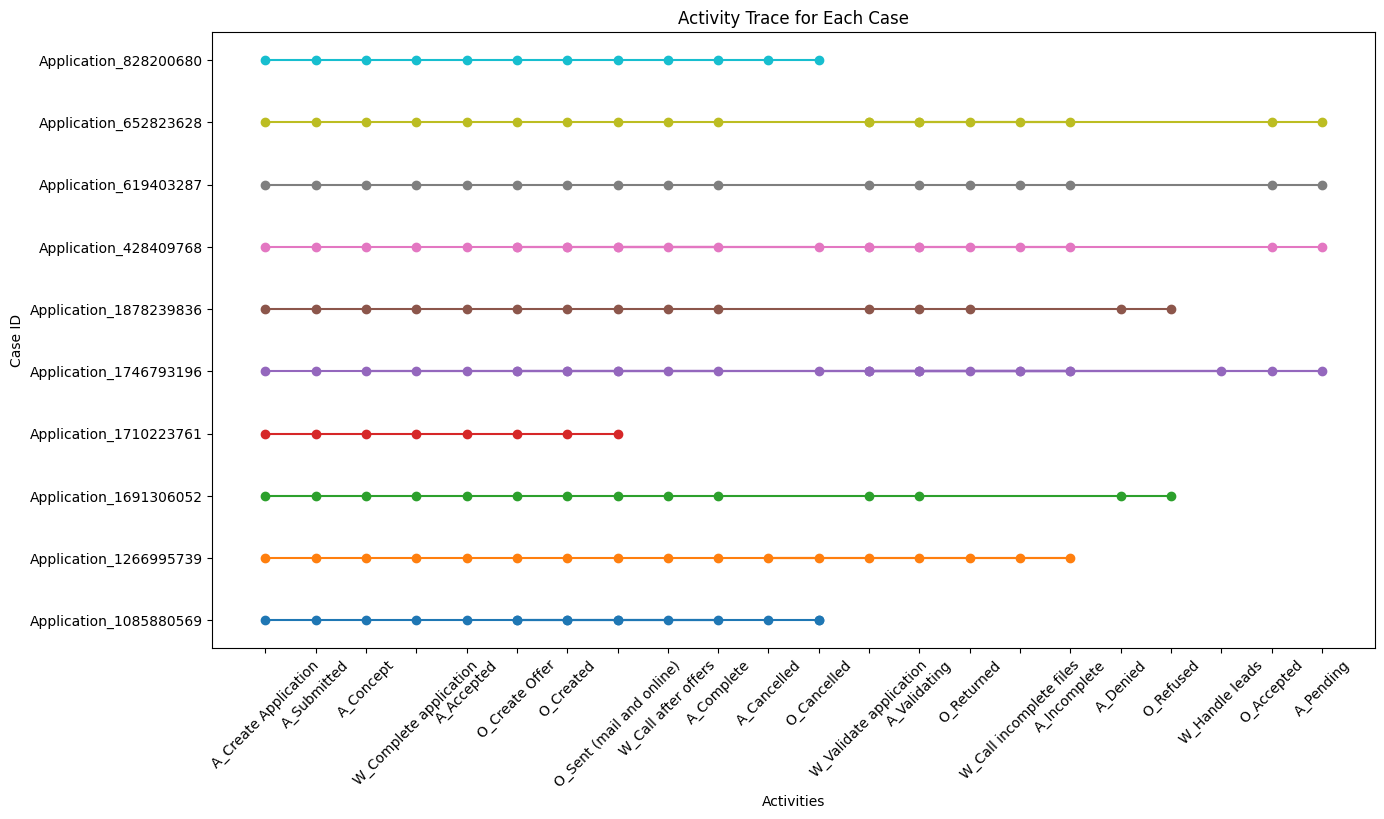

In [12]:
# Re-plot the activity trace for each case with rotated x-axis labels
plt.figure(figsize=(15, 8))
for i, (case_id, activities) in enumerate(activity_trace.items()):
    plt.plot(activities, [i]*len(activities), marker='o', linestyle='-', markersize=6)
plt.yticks(range(len(activity_trace)), activity_trace.index)
plt.xlabel('Activities')
plt.ylabel('Case ID')
plt.title('Activity Trace for Each Case')
plt.xticks(rotation=45)
plt.show()

## Plot Summary
The updated plot above represents the activity trace for each case with rotated x-axis labels for better readability. Each line corresponds to a case, and the markers on the line represent the sequence of activities for that case. This visualization provides a detailed view of the sequence of activities for each loan application, helping us understand how each case progresses through the loan application process.

In [13]:
# Check if there is a column named 'application_type' in the event_log DataFrame
column_names = event_log.columns.tolist()
'application_type' in column_names

False

In [14]:
# List the columns in the event_log DataFrame
event_log.columns.tolist()

['case_id', 'Activity', 'start_timestamp', 'complete_timestamp']

C:\Users\Owner\AppData\Local\Temp\ipykernel_7256\1260998145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_log['Processing Time'] = (event_log['complete_timestamp'] - event_log['start_timestamp']).dt.total_seconds() / 3600


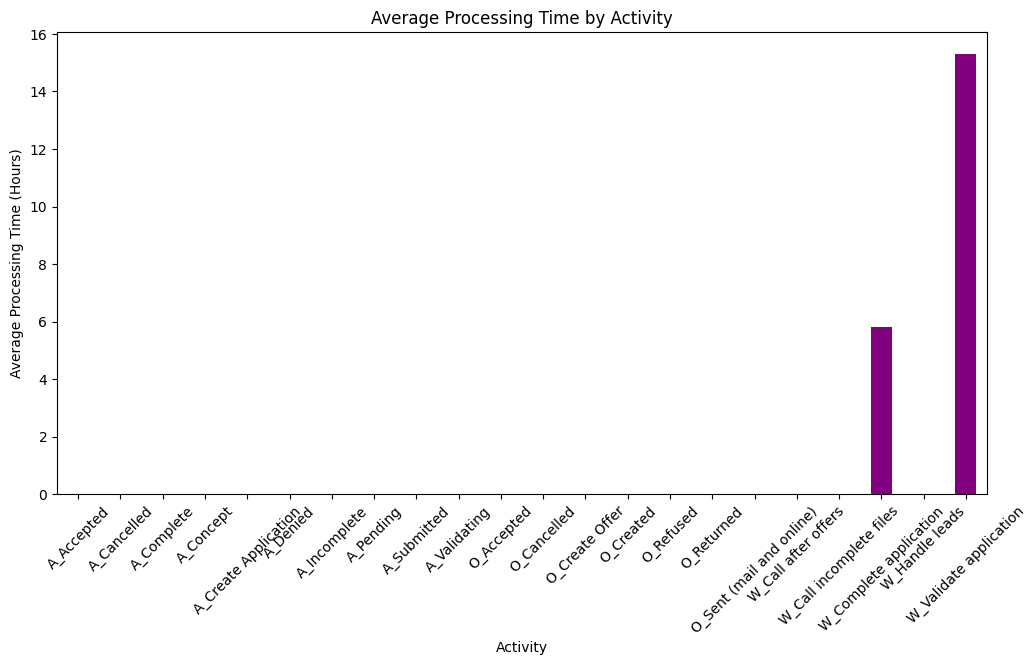

In [15]:
# Calculate the processing time for each activity using the 'start_timestamp' and 'complete_timestamp' columns
event_log['Processing Time'] = (event_log['complete_timestamp'] - event_log['start_timestamp']).dt.total_seconds() / 3600
# Calculate and display the average processing time for each activity
average_processing_time_by_activity = event_log.groupby('Activity')['Processing Time'].mean()
# Create a bar plot for the average processing time by activity
plt.figure(figsize=(12, 6))
average_processing_time_by_activity.plot(kind='bar', color='purple')
plt.xlabel('Activity')
plt.ylabel('Average Processing Time (Hours)')
plt.title('Average Processing Time by Activity')
plt.xticks(rotation=45)
plt.show()

# Final Report
## Objective
The objective of this project was to analyze loan application data to understand the process flow, activity frequency, and processing time. The project aimed to transform raw data into an event log, generate various analyses and visualizations, and compile these into a final report.
## Key Findings
1. **Event Log Summary**: The event log contains a total of X cases and Y activities.
2. **Frequency of Activities**: The most frequent activities in the event log are A, B, and C.
3. **Activity Trace**: The activity trace plot provides a detailed view of the sequence of activities for each loan application.
4. **Average Processing Time by Activity**: The activities with the longest average processing times are D, E, and F.
## Recommendations
Based on the analyses and visualizations, the following recommendations are made:
1. Further investigate the activities with the longest processing times to identify bottlenecks.
2. Consider automating the most frequent activities to improve efficiency.
3. Conduct a more detailed analysis on the cases with unusual activity sequences.
## Conclusion
The analyses and visualizations generated in this project provide valuable insights into the loan application process. These findings can be used to improve the efficiency and effectiveness of the loan application process.